In [1]:
# imports
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'

# load data
ds = pkl.load(open("/Users/cosinga/code/hcolor/fig_md_analysis/bias_results.pkl", 'rb'))
# ds is a DataSort object from the figrid module (software I've written), 
# allows me to more quickly sort through the
# tens of thousands of power spectra and organize them into many figures easily


In [14]:
# set some default settings for the figrid objects to have
ds.tickArgs(direction = 'in', labelsize = 12)
ds.legendArgs(frameon = False, fontsize = 12, slc = (-1,-1))
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20]) 
# limits chosen by where shot noise starts to play a significant role, and smallest k-mode measured
ds.axisLabelArgs('both', fontsize = 16)

# set the order in which figrids with these attributes display them in rows/cols/legends
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67, 33])

# set the names to display on the figures, when these attributes are plotted
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies', 'Matter'])
ds.displayAs('snapshot', [99, 67, 33], ['z = 0.0', 'z = 0.5', 'z = 2.0'])

# set the colors of the plots when using these attributes
ds.plotArgs('space', 'real', color = 'green')
ds.plotArgs('space', 'redshift', color = 'orange')
ds.plotArgs('HI_fieldname', 'hiptl', color = 'saddlebrown')
ds.plotArgs('HI_fieldname', 'vn', color = 'firebrick')
ds.plotArgs('HI_fieldname', 'hisubhalo', color = 'sandybrown')
ds.plotArgs('fieldname', 'hiptl', color = 'saddlebrown')
ds.plotArgs('fieldname', 'vn', color = 'firebrick')
ds.plotArgs('fieldname', 'hisubhalo', color = 'sandybrown')

# make plots displaying different snapshots in the same panel use a colormap
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
snapshots.reverse()
ss_colors = sns.color_palette('viridis', len(snapshots))
for ss in range(len(snapshots)):
    ds.plotArgs('snapshot', snapshots[ss], color = ss_colors[ss])
    
# default axis labels
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P (k) (cMpc/h)$^{-3}$'

# HI Auto Power

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 33]


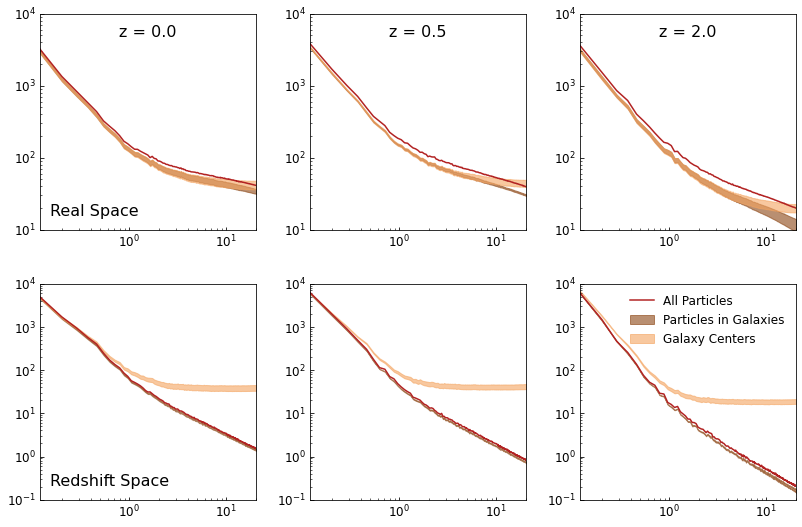

In [15]:
# comparing HI auto power spectra across different redshifts
ip = {'is_auto':True, 'is_atomic':True, 'path':'fiducial', 'simname':'tng100', 'space':['real', 'redshift']}
fg = ds.figrid('fieldname', 'space', 'snapshot', ip)
fg.autoFill(alpha = 0.6)
fg.axisArgs(ylim = [10, 1e4], slc = 'real')
fg.axisArgs(ylim = [0.1, 1e4], slc = 'redshift')
fg.setXLabel(XLAB); fg.setYLabel(YLAB)
fg.plot()

This is a similar plot to the HI auto power spectrum plot (Fig. 2) in the paper, except that it shows the results for different redshifts along the columns. This was excluded because the point of the paper was not to show the redshift evolution of the HI auto power spectrum, which has already been investigated in IllustrisTNG (see V-N18).

First, compare how All Particles (V-N18 model) and Particles in Galaxies/Galaxy Centers (D18 models) differ accross redshifts. It appears as though the differences between the models grow slightly across redshifts in both real and redshift space. The amount of HI that is contained only within galaxies also changes slightly across this redshift range (see Fig. 3 in V-N18), so it is reasonable that this might cause the slight shift seen in the power spectra.

Interestingly, the differences between the individual models used in D18 (i.e. the width of the shaded areas) shrinks from z = 0 -> z = 1 and then grows z = 1 -> z = 2, which corresponds to trends in the cosmic abundance of HI seen in V-N18 and Diemer et al. 2019 papers. It makes sense that as there is more HI, the HI clustering would be more sensitive to the model used to calculate the distribution.

Differences between the Particles in Galaxies and Galaxy Centers is simply due to how one represents the distribution, as described in the paper. As we go back in time, the scale at which this becomes important grows - <span style="color:red"> Why? </span>

The row values for space: ['real', 'redshift']
The column values for HI_fieldname: ['vn', 'hiptl', 'hisubhalo']


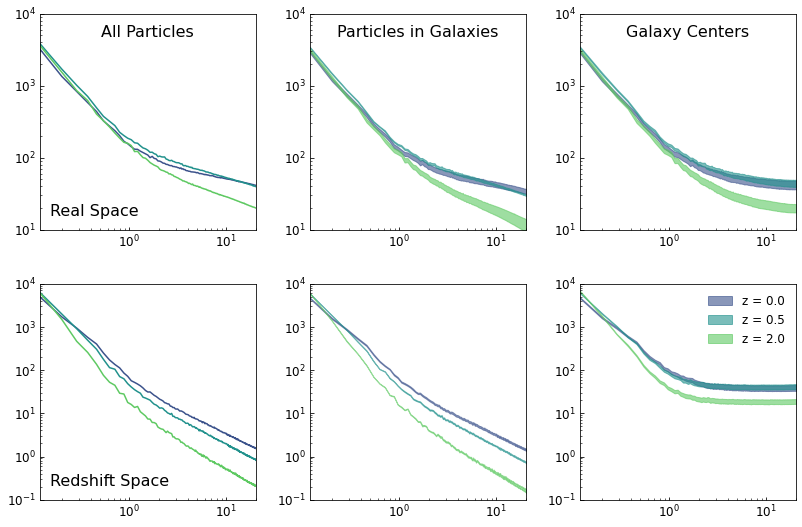

In [16]:
ip['HI_fieldname'] = ['vn', 'hiptl', 'hisubhalo']
fg = ds.figrid('snapshot', 'space', 'HI_fieldname', ip)
fg.autoFill(alpha = 0.6)
fg.axisArgs(ylim = [10, 1e4], slc = 'real')
fg.axisArgs(ylim = [0.1, 1e4], slc = 'redshift')
fg.setXLabel(XLAB); fg.setYLabel(YLAB)
fg.plot()

This plot more easily compares the redshift evolution of the HI auto power spectrum by plotting them on the same panel.

Interestingly, inverse redshift evolution?